## Observations and Insights 

- Infubinol regimen not effective
- Capmulin appears to be the best regimen
- The gender distribution is even 

In [214]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataset_merge = pd.merge(study_results, mouse_metadata,on='Mouse ID', how='left')

# Display the data table for preview
dataset_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [215]:
# Checking the number of mice.
len(set(dataset_merge['Mouse ID']))

249

In [216]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = set(dataset_merge.loc[dataset_merge.duplicated(subset=['Mouse ID','Timepoint']), "Mouse ID"])
print(duplicate)

{'g989'}


In [217]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate = dataset_merge.loc[dataset_merge['Mouse ID'].isin(duplicate)]
mouse_duplicate


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [218]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dup = dataset_merge[ ~dataset_merge['Mouse ID'].isin(duplicate) ]
no_dup.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [219]:
# Checking the number of mice in the clean DataFrame.
len(set(no_dup['Mouse ID']))

248

## Summary Statistics

In [220]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen = no_dup ['Tumor Volume (mm3)'].groupby(no_dup['Drug Regimen'])
stat_sum = pd.DataFrame({
        'mean': regimen.mean(),
        'median': regimen.median(),
        'var': regimen.var(),
        'std': regimen.std(),
        'sem': regimen.sem(), })

stat_sum


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [221]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen.agg(['mean', 'median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

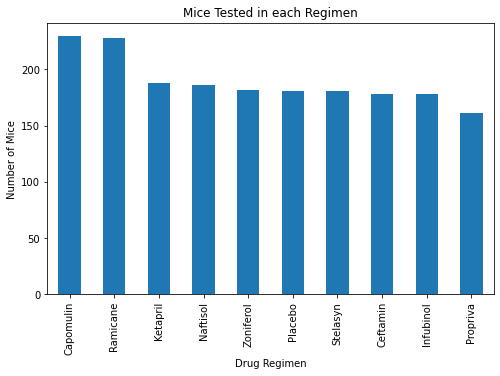

In [222]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

unique_mice = dataset_merge[['Mouse ID']].groupby(dataset_merge['Drug Regimen'], as_index=True).count()
unique_mice.sort_values('Mouse ID', ascending=False, inplace=True)
unique_mice.plot(kind="bar", figsize=(8,5), legend=False)
plt.title('Mice Tested in each Regimen')
plt.ylabel('Number of Mice')

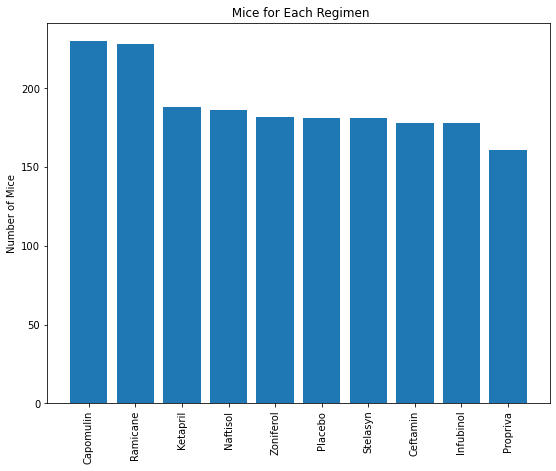

In [223]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.figure(figsize=(9,7))
plt.bar(unique_mice.index.values, unique_mice['Mouse ID'] )
plt.xticks(range(len(unique_mice)), unique_mice.index.values, rotation="vertical")
plt.title(' Mice for Each Regimen')
plt.ylabel('Number of Mice')
plt.show()


Text(0.5, 1.0, 'Gender Distro')

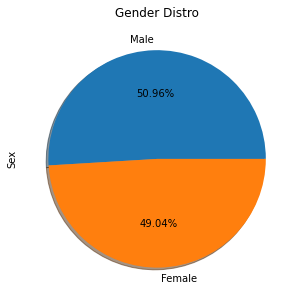

In [224]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_chart = no_dup ['Sex'].value_counts().plot.pie(autopct='%2.2f%%',shadow=True, figsize=(7,5))
plt.title('Gender Distro')


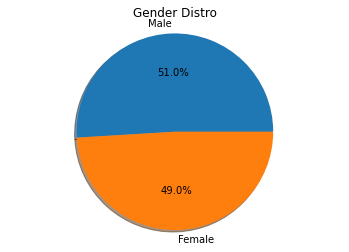

In [225]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(no_dup['Sex'].value_counts(),labels=['Male', 'Female'],autopct='%1.1f%%', shadow=True)
plt.title('Gender Distro')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [226]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_vol = no_dup[['Drug Regimen','Mouse ID','Timepoint']].groupby(['Drug Regimen','Mouse ID'], as_index=False).max()
tumor_vol = tumor_vol[
        tumor_vol['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin']) 
]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_vol = pd.merge(no_dup, tumor_vol, on=['Mouse ID','Timepoint'], how="inner",suffixes=('', '_x')) 
tumor_vol =tumor_vol[['Drug Regimen','Mouse ID','Timepoint', 'Tumor Volume (mm3)']]
tumor_vol.sort_values('Drug Regimen', inplace=True) 




In [227]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = list(tumor_vol['Drug Regimen'].unique())
print(treatment_list)
# Create empty list to fill with tumor vol data (for plotting)
tumor_list =[]

df_cap = tumor_vol.loc[tumor_vol["Drug Regimen"] == 'Capomulin',:]
df_cef= tumor_vol.loc[tumor_vol["Drug Regimen"] == 'Ceftamin',:]
df_inf = tumor_vol.loc[tumor_vol["Drug Regimen"] == 'Infubinol',:]
df_ram = tumor_vol.loc[tumor_vol["Drug Regimen"] == 'Ramicane',:]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = df_cap['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowqurt = quartiles[0.25]
upperqurt = quartiles[0.75]
IQR = upperqurt-lowqurt

lower_bound = lowqurt - (1.5*IQR)
upper_bound = upperqurt + (1.5*IQR)

outliers_cap = df_cap.loc[(df_cap['Tumor Volume (mm3)'] > upper_bound) |
                                    (df_cap['Tumor Volume (mm3)']  < lower_bound)]
print(f"Capomulin's possible outliers are below {round(lower_bound, 2)} or above {round(upper_bound, 2)}")
for i in range(len(outliers_cap)):
    out = outliers_cap.iloc[i]['Tumor Volume (mm3)']
    print(f" Capomulin outlliers: {round(out, 2)}")

#Ceftamin
quartiles = df_cef['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowqurt = quartiles[0.25]
upperqurt = quartiles[0.75]
IQR = upperqurt-lowqurt

lower_bound = lowqurt - (1.5*IQR)
upper_bound = upperqurt + (1.5*IQR)

outliers_cef = df_cef.loc[(df_cef['Tumor Volume (mm3)'] > upper_bound) |
                                    (df_cef['Tumor Volume (mm3)']  < lower_bound)]
print(f"Ceftamin's possible outliers are below {round(lower_bound, 2)} or above {round(upper_bound, 2)}")
for i in range(len(outliers_cef)):
    out = outliers_cef.iloc[i]['Tumor Volume (mm3)']
    print(f" Ceftamin outlliers: {round(out, 2)}")

#Infubinol
quartiles = df_inf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowqurt = quartiles[0.25]
upperqurt = quartiles[0.75]
IQR = upperqurt-lowqurt

lower_bound = lowqurt - (1.5*IQR)
upper_bound = upperqurt + (1.5*IQR)

outliers_inf = df_inf.loc[(df_inf['Tumor Volume (mm3)'] > upper_bound) |
                                    (df_inf['Tumor Volume (mm3)']  < lower_bound)]
print(f"Infubinol's possible outliers are below {round(lower_bound, 2)} or above {round(upper_bound, 2)}")
for i in range(len(outliers_inf)):
    out = outliers_inf.iloc[i]['Tumor Volume (mm3)']
    print(f' Infubinol outlliers: {round(out, 2)}')

#Ramicane
quartiles = df_ram['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowqurt = quartiles[0.25]
upperqurt = quartiles[0.75]
IQR = upperqurt-lowqurt

lower_bound = lowqurt - (1.5*IQR)
upper_bound = upperqurt + (1.5*IQR)

outliers_ram = df_ram.loc[(df_ram['Tumor Volume (mm3)'] > upper_bound) |
                                    (df_ram['Tumor Volume (mm3)']  < lower_bound)]
print(f"Ramicane's possible outliers are below {round(lower_bound, 2)} or above {round(upper_bound, 2)}")
for i in range(len(outliers_ram)):
    out = outliers_ram.iloc[i]['Tumor Volume (mm3)']
    print(f' Ramicane outlliers: {round(out, 2)}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
Capomulin's possible outliers are below 20.7 or above 51.83
Ceftamin's possible outliers are below 25.36 or above 87.67
Infubinol's possible outliers are below 36.83 or above 82.74
 Infubinol outlliers: 36.32
Ramicane's possible outliers are below 17.91 or above 54.31


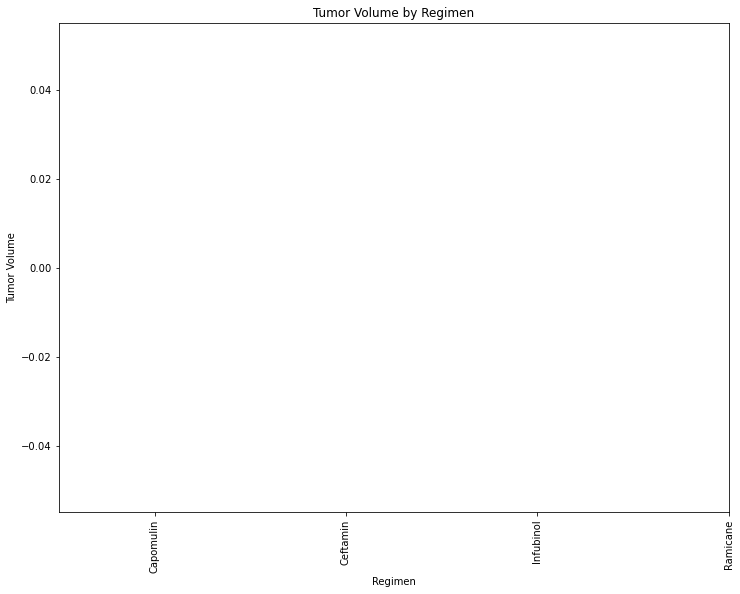

In [228]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='r', marker='D')
fig = plt.figure(figsize =(12, 9),)  
plt.boxplot((tumor_list), flierprops=green_diamond)
plt.title('Tumor Volume by Regimen')
plt.xlabel('Regimen')
plt.xticks([1,2,3, 4],treatment_list, rotation="vertical")
plt.ylabel('Tumor Volume')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

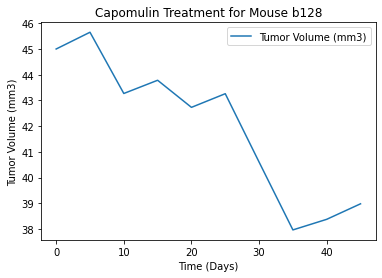

In [229]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mt=no_dup[no_dup['Mouse ID']=='b128'] 
mt.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Capomulin Treatment for Mouse b128')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

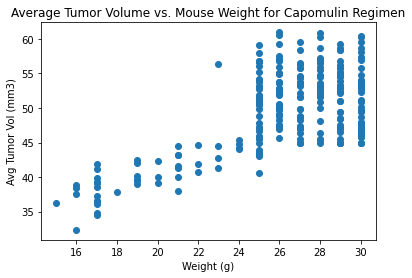

In [230]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tum_avg=no_dup[no_dup['Drug Regimen']=='Capomulin'] 
tum_avg=no_dup.groupby('Mouse ID')  
plt.scatter( tum_avg['Weight (g)'].mean() ,tum_avg['Tumor Volume (mm3)'].mean() ) 
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')
plt.show()

## Correlation and Regression

In [232]:
# Calculate the correlation coefficient 
col=no_dup[no_dup['Drug Regimen']=='Capomulin'] 
col=col.groupby('Mouse ID').mean()  
correlation = st.pearsonr(col['Tumor Volume (mm3)'],col['Weight (g)'])
print(f"The correlation between both factors is {round(correlation[0],1)}")
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between both factors is 0.8
